In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import env
np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [3]:
#1. Apply the scalers we talked about in this lesson to your data and 
#visualize the results for the unscaled and scaled distribution.


In [4]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)
x_train

array([[104.83894139],
       [103.33885596],
       [104.3073771 ],
       [106.51565712],
       [107.89475477],
       [112.89161906],
       [109.90629604],
       [104.80311019],
       [118.49000516],
       [101.28562953],
       [111.54643687],
       [108.44825242],
       [105.48641412],
       [105.03860412],
       [109.26767633],
       [103.05985027],
       [104.20387184],
       [102.72517838],
       [119.0106724 ],
       [103.7767904 ],
       [109.34823257],
       [105.27613927],
       [100.23889789],
       [135.33862927],
       [100.08247792],
       [110.89208553],
       [106.38623697],
       [108.49792857],
       [100.52811742],
       [ 99.37645583],
       [ 97.84266036],
       [110.38837508],
       [110.87956048],
       [110.81693156],
       [125.5418688 ],
       [118.35375282],
       [108.45465563],
       [107.21212006],
       [108.17837011],
       [103.92042066],
       [112.63181743],
       [110.01206691],
       [107.7839439 ],
       [105

In [5]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

Text(0.5, 1.0, 'Scaled')

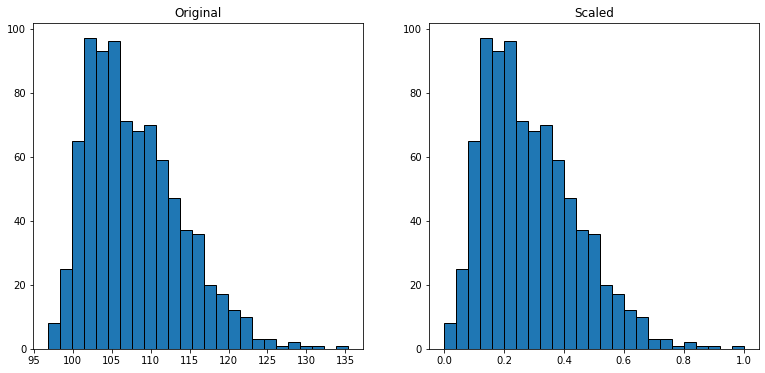

In [8]:
#applying the minmax scaler
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

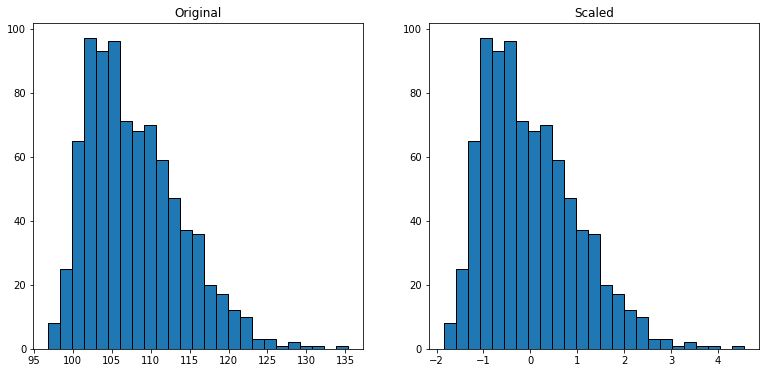

In [9]:
#applying the standard scaler
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

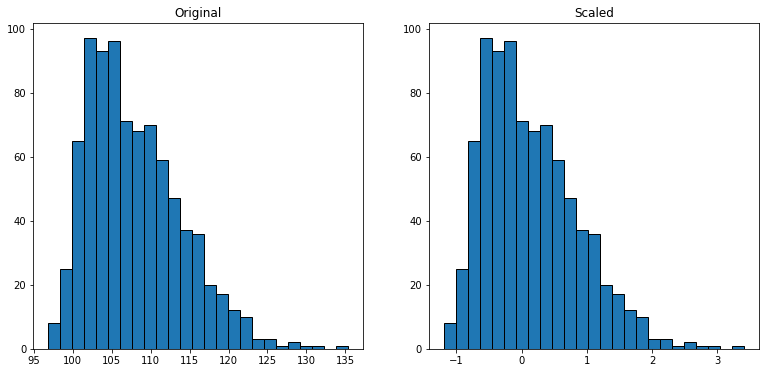

In [10]:
#applying the robust scaler
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [11]:
#2. Apply the .inverse_transform method to your scaled data. Is the 
#resulting dataset the exact same as the original data?

In [12]:
# I don't know how to use .inverse_tranform method
inverse_transform(x_train_scaled)
x_validate_scaled
x_test_scaled

NameError: name 'inverse_transform' is not defined

In [13]:
#3. Read the documentation for sklearn's QuantileTransformer. Use normal 
#for the output_distribution and apply this scaler to your data. 
#Visualize the result of your data scaling.

In [14]:
from sklearn.preprocessing import QuantileTransformer

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (843). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


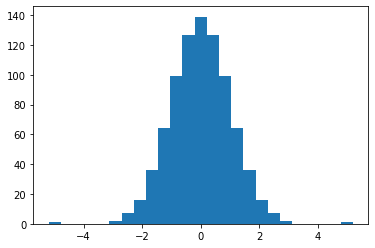

In [15]:
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(x_train_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (282). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


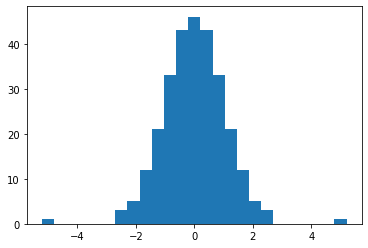

In [16]:
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(x_validate_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (375). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


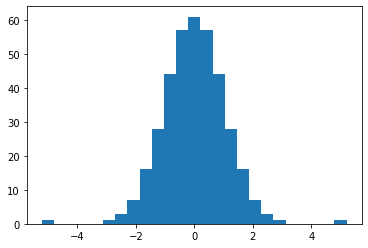

In [17]:
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(x_test_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (843). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


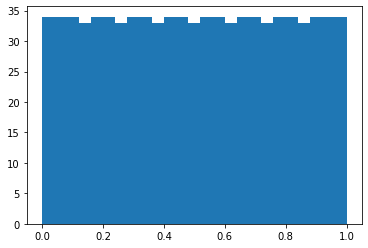

In [18]:
#Use the QuantileTransformer, but omit the output_distribution argument.
#Visualize your results. What do you notice?
# quantile transform the raw data
quantile = QuantileTransformer()
data_trans = quantile.fit_transform(x_train_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (282). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


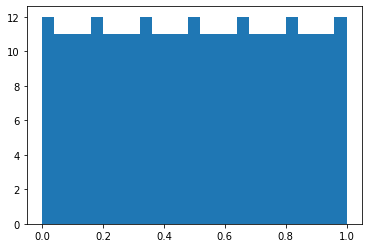

In [19]:
# quantile transform the raw data
quantile = QuantileTransformer()
data_trans = quantile.fit_transform(x_validate_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (375). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


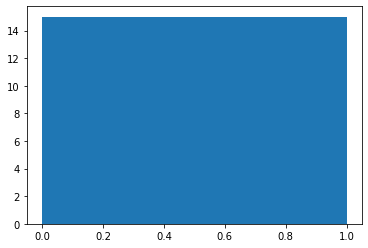

In [20]:
# quantile transform the raw data
quantile = QuantileTransformer()
data_trans = quantile.fit_transform(x_test_scaled)
# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

I can see a clear difference in the distributions but not sure how or why it is being transformed to this display.

Text(0.5, 1.0, 'Scaled')

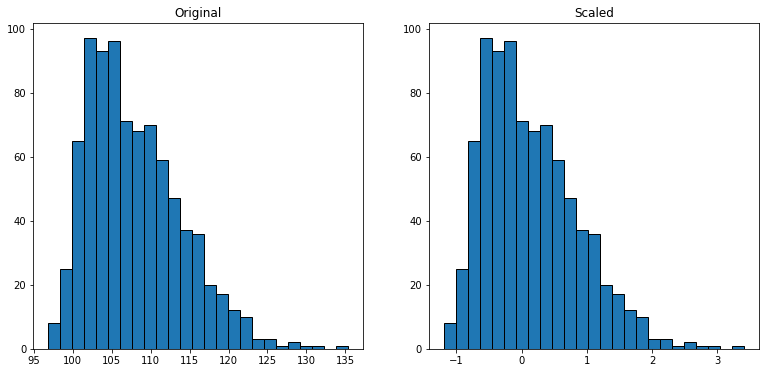

In [21]:
#5. Based on the work you've done, choose a scaling method for your 
#dataset. Write a function within your prepare.py that accepts as input 
#the train, validate, and test data splits, and returns the scaled 
#versions of each. Be sure to only learn the parameters for scaling 
#from your training data!
def scale_dataset(train, validate, test):
    #applying the robust scaler
    scaler = sklearn.preprocessing.RobustScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(x_train)

    x_train_scaled = scaler.transform(x_train)
    x_validate_scaled = scaler.transform(x_validate)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_validate_scaled, x_test_scaled

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
    